<a href="https://colab.research.google.com/github/Dilavarj7/SGEMM-GPU-Kernel-Performance/blob/main/Dilavar_Singh_Team_5_SGEMM_GPU_Kernel_Performance_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the running times for multiplying two 2048 x 2048 matrices using a GPU OpenCL SGEMM kernel with varying parameters (using the library 'CLTune'). </u></b>

## <b> Problem Description </b>

### This data set measures the running time of a matrix-matrix product $A*B = C$, where all matrices have size 2048 x 2048, using a parameterizable SGEMM GPU kernel with 241600 possible parameter combinations. For each tested combination, 4 runs were performed and their results are reported as the 4 last columns. All times are measured in milliseconds*.

### There are 14 parameter, the first 10 are ordinal and can only take up to 4 different powers of two values, and the 4 last variables are binary. Out of 1327104 total parameter combinations, only 241600 are feasible (due to various kernel constraints). This data set contains the results for all these feasible combinations.

### The experiment was run on a desktop workstation running Ubuntu 16.04 Linux with an Intel Core i5 (3.5GHz), 16GB RAM, and a NVidia Geforce GTX 680 4GB GF580 GTX-1.5GB GPU. We use the 'gemm_fast' kernel from the automatic OpenCL kernel tuning library 'CLTune' ([Web Link]).

#### * Note: for this kind of data sets it is usually better to work with the logarithm of the running times 


## <b> Data Description </b>

### <b>Attribute Information: </b>

### Independent variables:
* ### MWG, NWG: per-matrix 2D tiling at workgroup level: {16, 32, 64, 128} (integer)
* ### KWG: inner dimension of 2D tiling at workgroup level: {16, 32} (integer)
* ### MDIMC, NDIMC: local workgroup size: {8, 16, 32} (integer)
* ### MDIMA, NDIMB: local memory shape: {8, 16, 32} (integer)
* ### KWI: kernel loop unrolling factor: {2, 8} (integer)
* ### VWM, VWN: per-matrix vector widths for loading and storing: {1, 2, 4, 8} (integer)
* ### STRM, STRN: enable stride for accessing off-chip memory within a single thread: {0, 1} (categorical)
* ### SA, SB: per-matrix manual caching of the 2D workgroup tile: {0, 1} (categorical)

### Output:
* ### Run1, Run2, Run3, Run4: performance times in milliseconds for 4 independent runs using the same parameters. They range between 13.25 and 3397.08.

## **Importing Important Library and connecting Drive**

In [1]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Reading Dataset and first look of data.**

In [3]:
sgemm_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 2/Day 1/data/sgemm_product.csv')

In [4]:
#First Look
sgemm_df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [5]:
sgemm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   MWG        241600 non-null  int64  
 1   NWG        241600 non-null  int64  
 2   KWG        241600 non-null  int64  
 3   MDIMC      241600 non-null  int64  
 4   NDIMC      241600 non-null  int64  
 5   MDIMA      241600 non-null  int64  
 6   NDIMB      241600 non-null  int64  
 7   KWI        241600 non-null  int64  
 8   VWM        241600 non-null  int64  
 9   VWN        241600 non-null  int64  
 10  STRM       241600 non-null  int64  
 11  STRN       241600 non-null  int64  
 12  SA         241600 non-null  int64  
 13  SB         241600 non-null  int64  
 14  Run1 (ms)  241600 non-null  float64
 15  Run2 (ms)  241600 non-null  float64
 16  Run3 (ms)  241600 non-null  float64
 17  Run4 (ms)  241600 non-null  float64
dtypes: float64(4), int64(14)
memory usage: 33.2 MB


In [6]:
sgemm_df.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
count,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000
mean,80.415364,80.415364,25.513113,13.935894,13.935894,17.371126,17.371126,5.000000,2.448609,2.448609,0.500000,0.500000,0.500000,0.500000,217.647852,217.579536,217.532756,217.527669
std,42.469220,42.469220,7.855619,7.873662,7.873662,9.389418,9.389418,3.000006,1.953759,1.953759,0.500001,0.500001,0.500001,0.500001,369.012422,368.677309,368.655118,368.677413
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.290000,13.250000,13.360000,13.370000
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.660000,40.710000,40.660000,40.640000
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,5.000000,2.000000,2.000000,0.500000,0.500000,0.500000,0.500000,69.825000,69.930000,69.790000,69.820000
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,228.530000,228.310000,228.320000,228.320000
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,3339.630000,3375.420000,3397.080000,3361.710000


## **Let's do some analysis for Target Variable.**

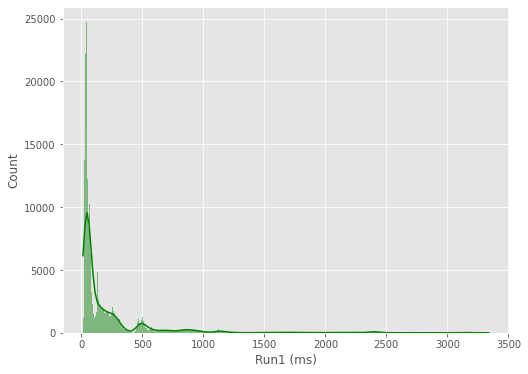

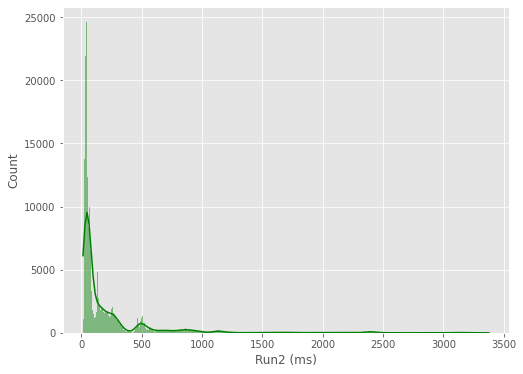

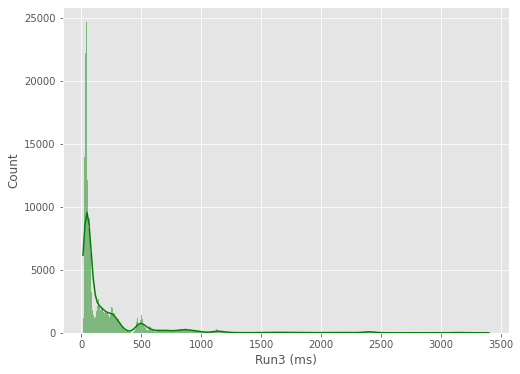

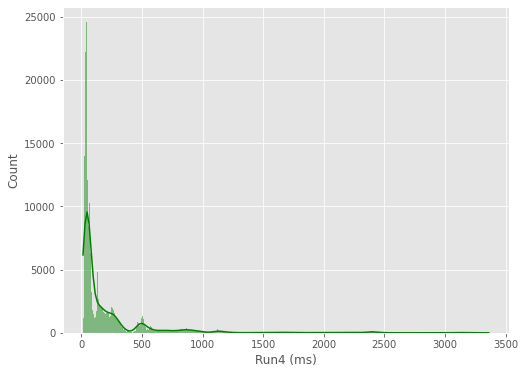

In [19]:
depndent_var = ['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']
# Let's plot distplot for target variable
for depend in depndent_var:
  plt.figure(figsize=(8,6))
  sns.histplot(sgemm_df[depend],color='green',kde=True)
  plt.show()

### All the plot looks same .

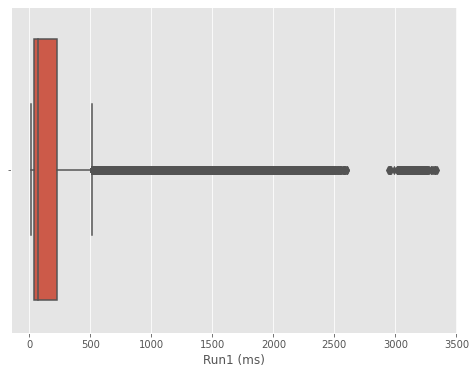

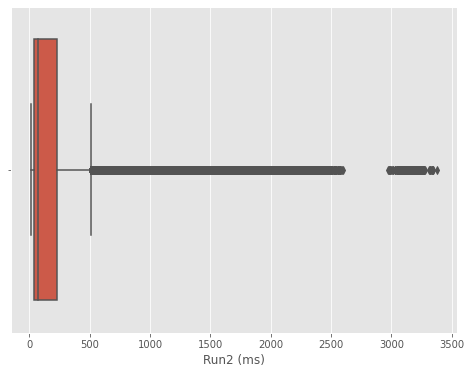

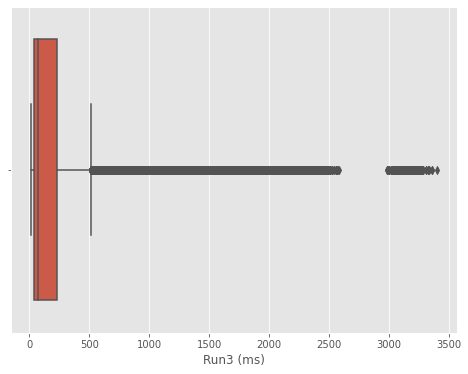

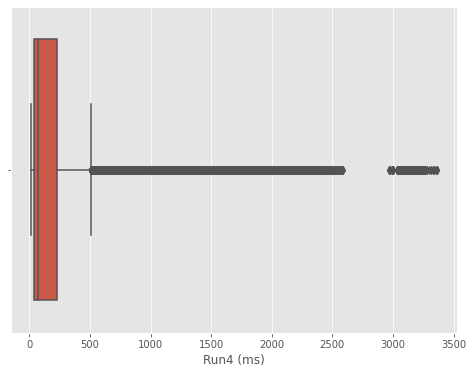

In [36]:
depndent_var = ['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']
# Let's plot distplot for target variable
for depend in depndent_var:
  plt.figure(figsize=(8,6))
  sns.boxplot(x=depend,data=sgemm_df)
  plt.show()

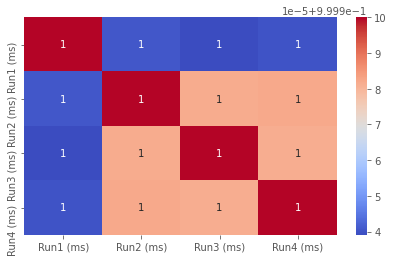

In [33]:
plt.figure(figsize=(7,4))
sns.heatmap(sgemm_df[depndent_var].corr().abs(),annot=True,cmap='coolwarm')

## **Basic EDA**

### **Count plot for independent Variable**

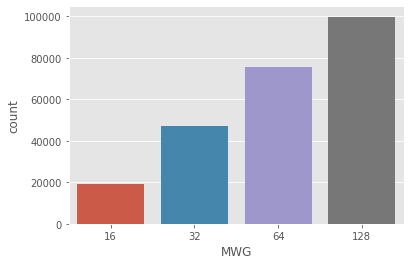

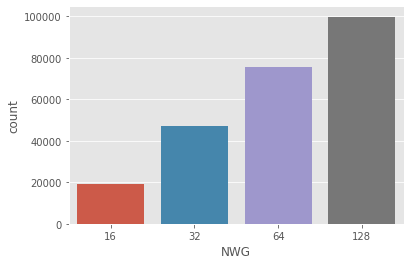

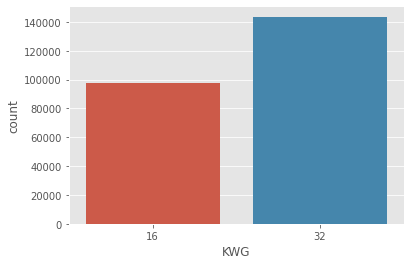

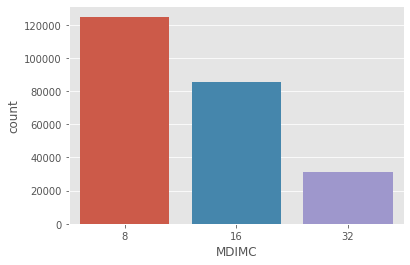

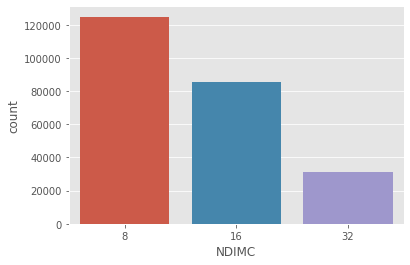

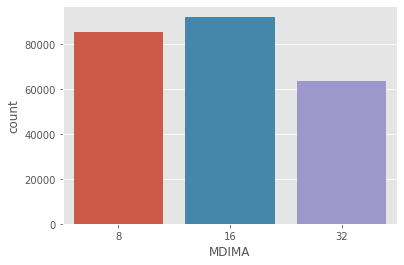

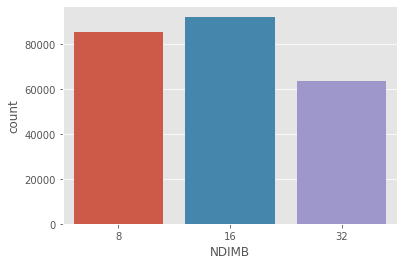

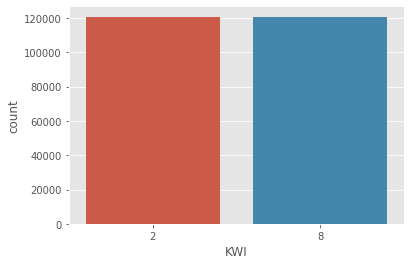

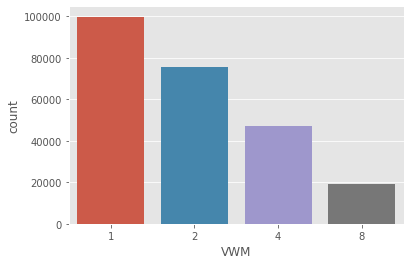

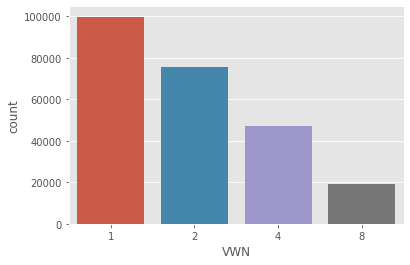

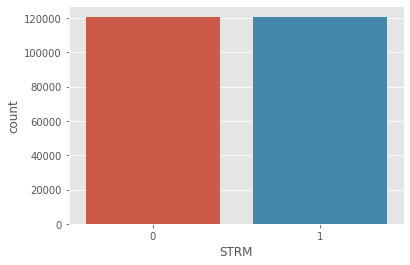

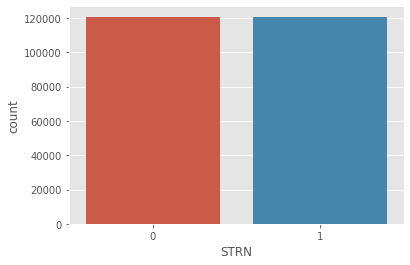

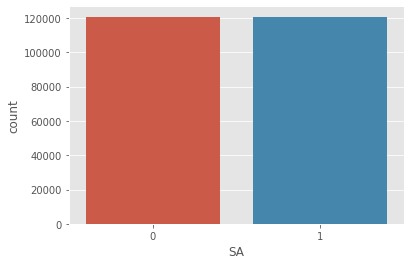

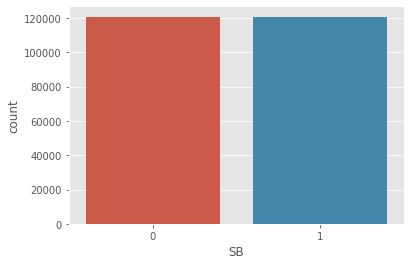

In [32]:
for column in sgemm_df.describe().columns:
  if column not in depndent_var:
    sns.countplot(x=column,data=sgemm_df)
    plt.show()

### Heatmap for Independent Variable..

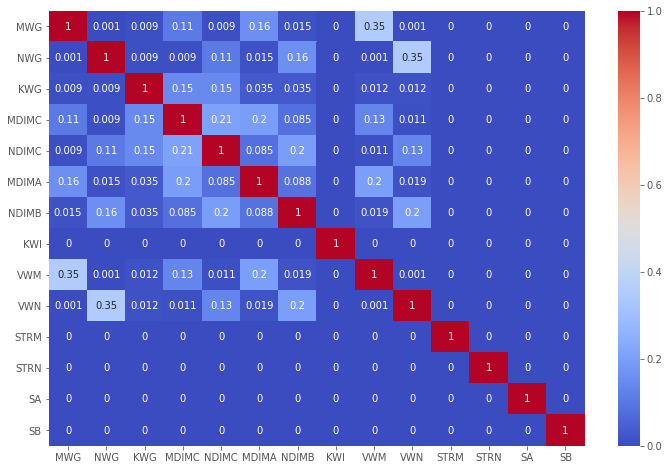

In [46]:
plt.figure(figsize=(12,8))
sns.heatmap(round(sgemm_df[[columns for columns in sgemm_df.describe().columns if columns not in depndent_var]].corr().abs(),3),annot=True,cmap='coolwarm')

### We have good data and they are not cor-related to eachother.I don't think we need any kind of feature engineering for our data.

In [156]:
X=sgemm_df.drop([columns for columns in depndent_var],axis=1)
y=sgemm_df['Run2 (ms)']

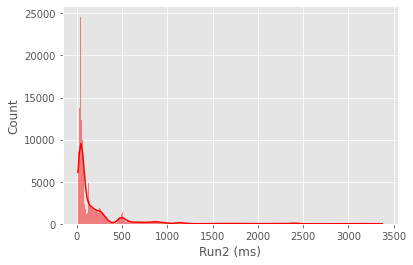

In [67]:
plt.figure(figsize=(6,4))
sns.histplot(y,color='red',kde=True)
plt.show()

### As we can see our target is not looking normally distributed let's take log on y variable and draw the plot.

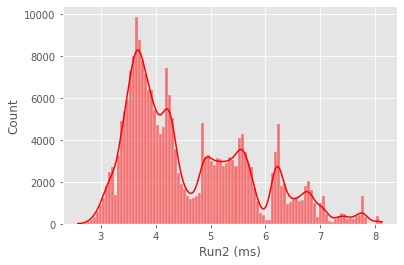

In [68]:
plt.figure(figsize=(6,4))
sns.histplot(np.log(y),color='red',kde=True)
plt.show()

In [157]:
y_final=np.log(y)

## Splitting train and test data..

In [158]:
# import libraray
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [159]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y_final, test_size = 0.25, random_state = 0)

In [160]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((181200, 14), (60400, 14), (181200,), (60400,))

## **Linear Regression**

In [106]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
regressor.intercept_

4.2276729508475395

In [108]:
regressor.coef_

array([ 1.33797073e-02,  1.05560394e-02,  1.25525108e-02, -5.69328538e-02,
       -5.47502720e-02,  1.58026658e-04, -6.67387971e-05, -3.80428976e-03,
       -8.85363877e-03, -2.38918475e-02, -1.32993926e-01, -1.67241296e-02,
       -1.89148949e-01, -4.74513659e-02])

In [109]:
y_pred_train=regressor.predict(X_train)

In [110]:
y_pred=regressor.predict(X_test)

### **Evaluation Matrix**

In [111]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score

In [112]:
r2_score(y_test, y_pred)

0.555023334728897

In [113]:
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted R2 :  0.5549201688215724


Text(0, 0.5, 'Predicted')

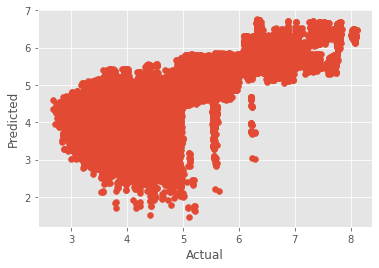

In [114]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

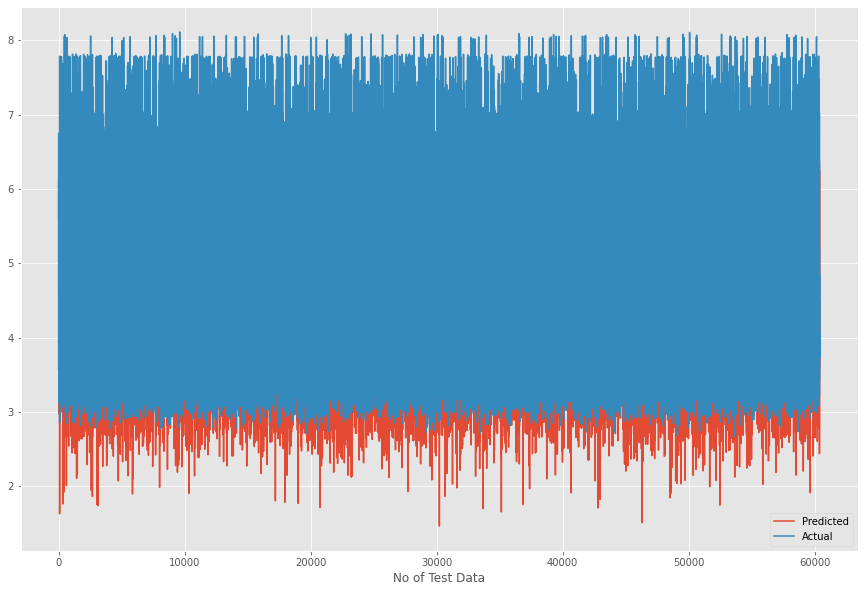

In [115]:
plt.figure(figsize=(15,10))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

## **Lasso Regression**

In [122]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [123]:
y_pred=lasso.predict(X_test)

In [124]:
r2_score(y_test, y_pred)

0.5550035837697891

## **Ridge Rigression**

In [131]:
# Hyperprarameter tuning
from sklearn.model_selection import GridSearchCV
ridge = Ridge(alpha=30)
ridge.fit(X_train,y_train)

Ridge(alpha=30, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [132]:
y_pred=ridge.predict(X_test)

In [133]:
r2_score(y_test, y_pred)

0.555023017899395

## **Decision Tree Regression**

In [161]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

In [162]:
tree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [163]:
y_pred=tree.predict(X_test)

In [164]:
r2_score(y_test, y_pred)

0.9989342918907222

In [165]:
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted R2 :  0.9989340448109254


Text(0, 0.5, 'Predicted')

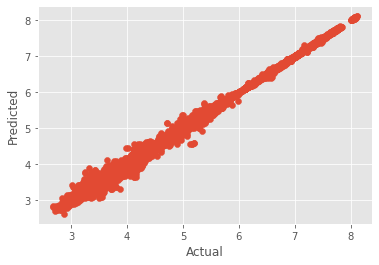

In [150]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

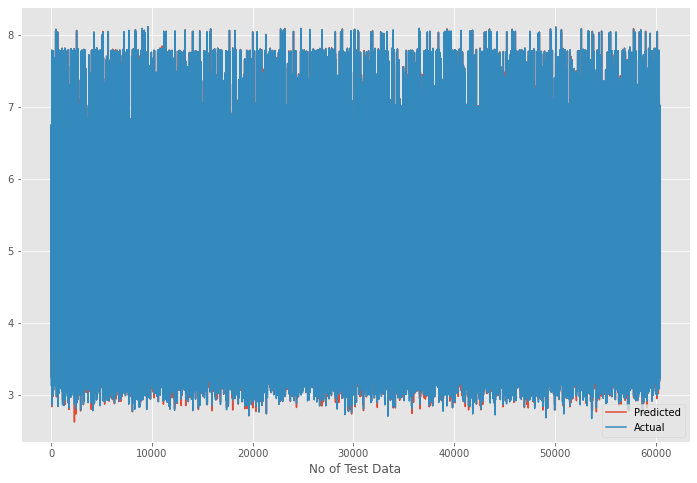

In [155]:
plt.figure(figsize=(12,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

In [152]:
tree.feature_importances_

array([0.27864548, 0.23287067, 0.01368845, 0.18069592, 0.205845  ,
       0.00117327, 0.00116471, 0.00397397, 0.01422874, 0.00802614,
       0.01216689, 0.00142521, 0.02820803, 0.01788754])

In [153]:
features = X.columns
importances = tree.feature_importances_
indices = np.argsort(importances)

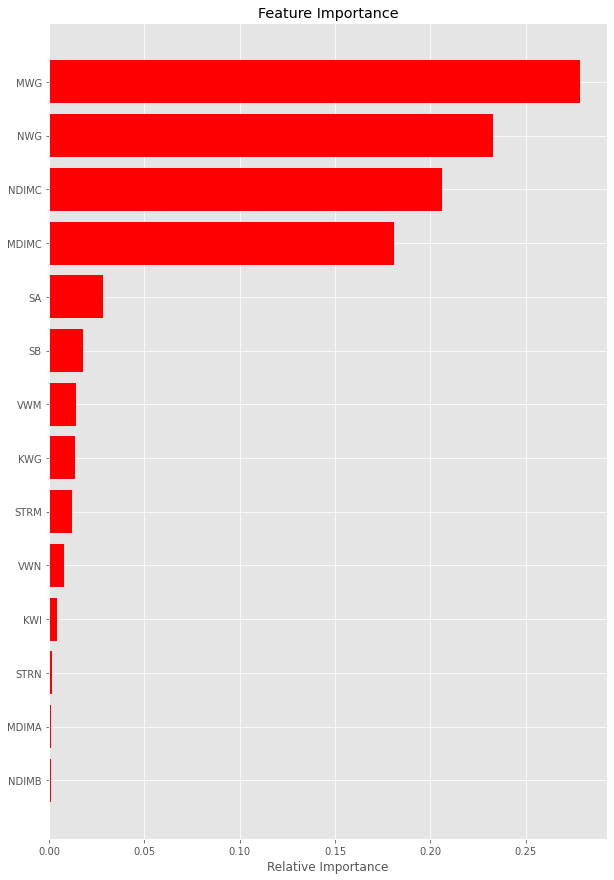

In [154]:
plt.figure(figsize=(10,15))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()